In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
path_to_all_csvs = '/media/vkuzia/Seagate Expansion Drive/vova/csv_again'
languages = 'ar cs el eo et eu fy id it ky lt mt nl pl pt ro ru sv tr tt uk'.split()
stats_dict = {}
lower_bound = 100
upper_bound = 1000
dfs = []
for language in tqdm(languages):
    data = pd.read_csv(os.path.join(path_to_all_csvs, f'{language}_splits.csv'))
    counts = data['WORD'].value_counts()
    labels = [(x, y) for x, y in zip(counts.index, counts.values) if y >= lower_bound and len(x) > 3]
    if len(labels)> 300:
        labels = labels[:300]
    label_dfs = []
    for label, count in labels:
#         print(label, count)
#         print(len(data[data['WORD'] == label]))
        label_dfs.append(data[data['WORD'] == label].sample(n=min(upper_bound, count)))
#     print(len(label_dfs))
    df = pd.concat(label_dfs, ignore_index=True).sample(frac=1)
    df['LANGUAGE'] = language
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True).sample(frac=1)
df.head()

100%|███████████████████████████████████████████| 21/21 [00:50<00:00,  2.38s/it]


,SET,LINK,WORD,VALID,SPEAKER,GENDER,LANGUAGE
653404,TRAIN,очень/common_voice_ru_18956411.opus,очень,True,391f19cc56c80b71950a424f9dff058a997032adeb8603...,MALE,ru
493068,TRAIN,dalej/common_voice_pl_20662711.opus,dalej,True,b54662de1e19ae428bce2d653df3e52e750d4bdee46fbe...,MALE,pl
46454,TRAIN,infanoj/common_voice_eo_19827113.opus,infanoj,True,f9c44725569f8eeae8e1173abe5271cdc375a401111056...,MALE,eo
430577,TRAIN,iedereen/common_voice_nl_18113476.opus,iedereen,True,a5e6ec6cb0016841dde9e9be8a7c23b0d0cecf71deab4a...,MALE,nl
59942,TRAIN,urbo/common_voice_eo_20644095.opus,urbo,True,a79cbe4bac5633d9c5bc46c42709df236bc755815ce6d8...,MALE,eo


In [7]:
# df.to_csv('~/Desktop/coursework/new_data/csv/__ALL_g100_b1000.csv')
# df = pd.read_csv('~/Desktop/coursework/new_data/csv/__ALL_g100_b1000.csv', delimiter=',')
# df.head()

,Unnamed: 0,SET,LINK,WORD,VALID,SPEAKER,GENDER,LANGUAGE
0,232423,DEV,kalau/common_voice_id_20953348.opus,kalau,True,d2193174e76e311bd96c42b44132387ce1902e8c043d11...,FEMALE,id
1,143173,TEST,duen/common_voice_eu_18651347.opus,duen,True,d6427a008d189264b1f97279abea69372457042479f27c...,NAN,eu
2,485710,TRAIN,ludzi/common_voice_pl_20774496.opus,ludzi,True,426f581b9abd5099fc26d0a12f0566dd97ab88b30d59a3...,MALE,pl
3,98336,TRAIN,ning/common_voice_et_18318765.opus,ning,True,e6608db93a4b661ccb2ea2b961be1290657245a3440490...,MALE,et
4,310624,TRAIN,stati/common_voice_it_20405176.opus,stati,True,6ac664d0b4cf9e60befb93d491fe3ce3f161d580dc8fe3...,FEMALE,it


In [8]:
print(len(df))
print(len(df[df['SET'] == 'TRAIN']))
print(len(df[df['VALID'] == True]))
print(df['GENDER'].value_counts())

790178
630854
787574
MALE      504887
NAN       156264
FEMALE    120375
OTHER       6048
Name: GENDER, dtype: int64


In [3]:
def edit_path(row):
    row['path'] = f"{row['language']}/clips/{row['path']}".replace('.opus', '.wav')
    return row

df = df[['SET', 'LINK', 'WORD', 'LANGUAGE', 'GENDER']]
df = df.rename(columns={'SET': 'mode', 'LINK': 'path', 'WORD': 'label', 'LANGUAGE': 'language', 'GENDER': 'gender'})
df['mode'] = df['mode'].map({'TEST': 'val', 'DEV': 'val', 'TRAIN': 'train'})
df['gender'] = df['gender'].map({'MALE': 'm', 'FEMALE': 'f', 'OTHER': 'n', 'NAN': 'n'})
print(df.columns)
df = df.apply(lambda x: edit_path(x), axis=1)
df = df[['mode', 'label', 'path', 'language', 'gender']]
df.head()

Index(['mode', 'path', 'label', 'language', 'gender'], dtype='object')


,mode,label,path,language,gender
653404,train,очень,ru/clips/очень/common_voice_ru_18956411.wav,ru,m
493068,train,dalej,pl/clips/dalej/common_voice_pl_20662711.wav,pl,m
46454,train,infanoj,eo/clips/infanoj/common_voice_eo_19827113.wav,eo,m
430577,train,iedereen,nl/clips/iedereen/common_voice_nl_18113476.wav,nl,m
59942,train,urbo,eo/clips/urbo/common_voice_eo_20644095.wav,eo,m


In [4]:
df.to_csv('~/Desktop/coursework/new_data/csv/___ALL_FORMATTED.csv')

ar: 8; 1217


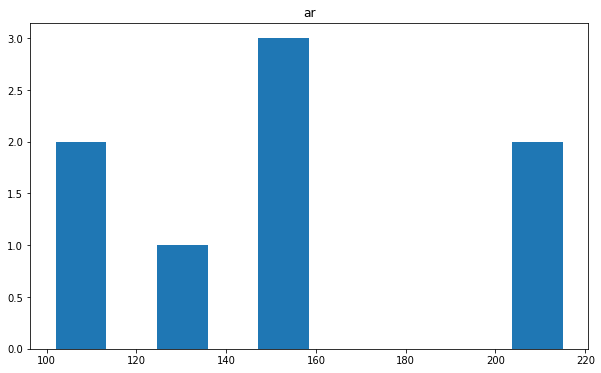

cs: 69; 13740


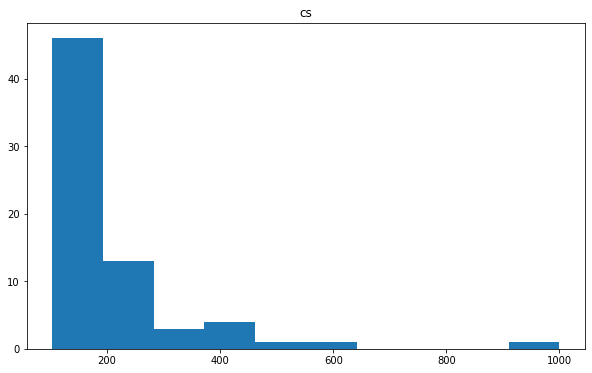

el: 13; 2356


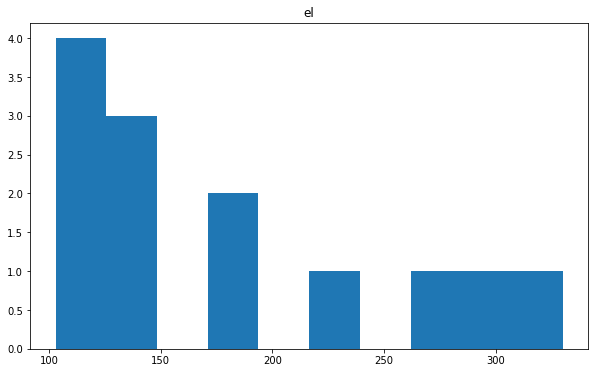

eo: 291; 72359


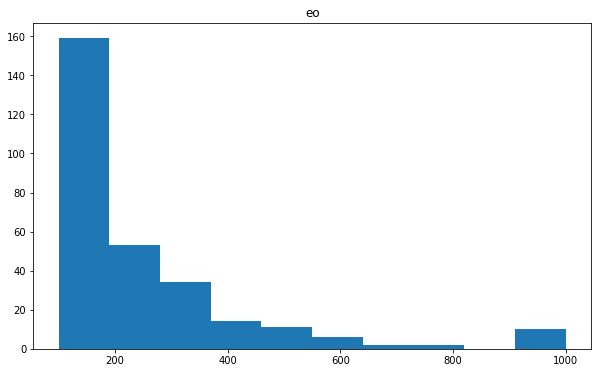

et: 76; 14341


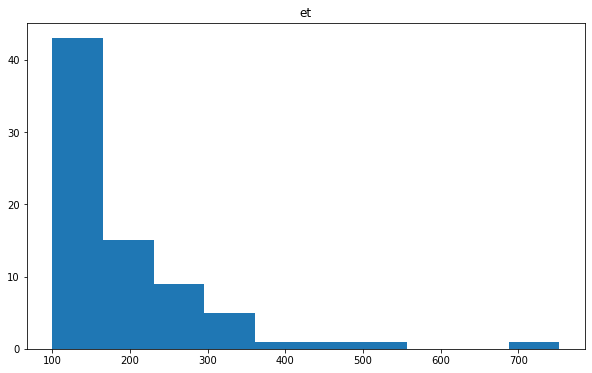

eu: 300; 115814


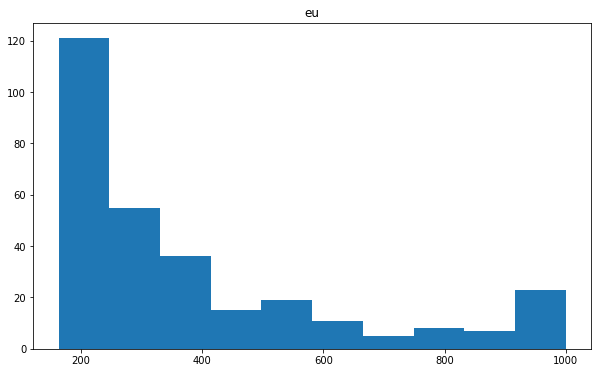

fy: 22; 3936


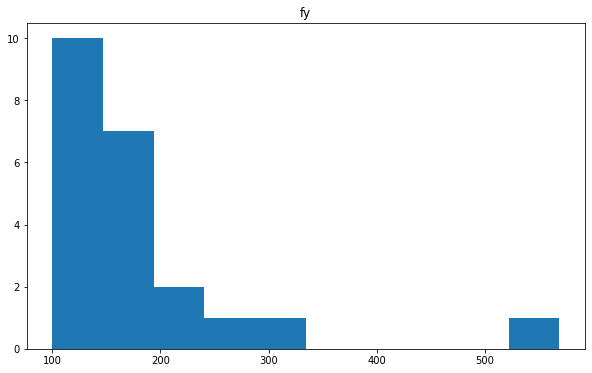

id: 47; 11304


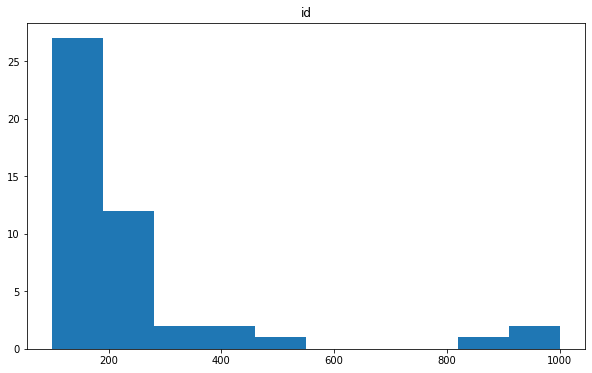

it: 300; 125780


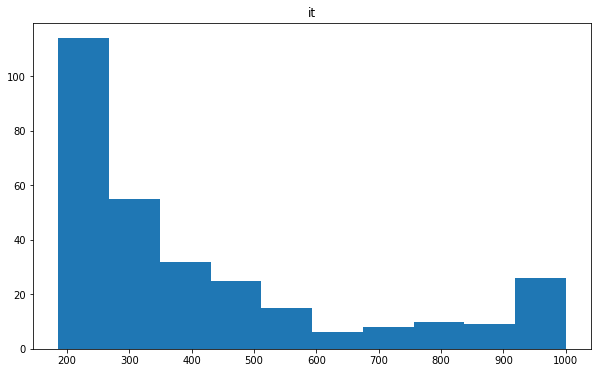

ky: 42; 8421


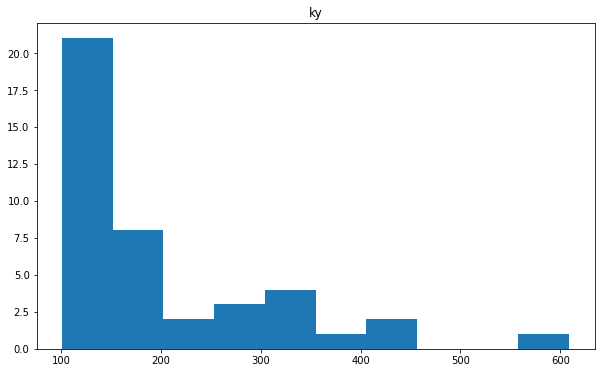

lt: 14; 2864


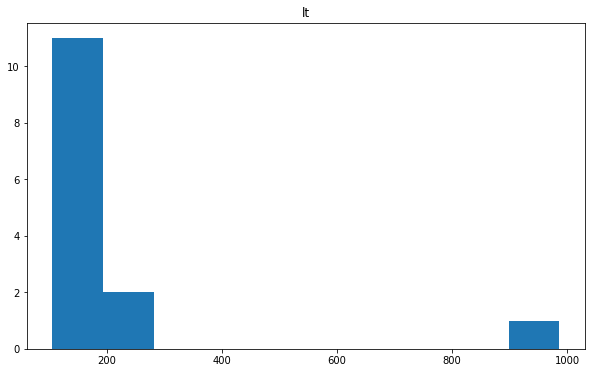

mt: 30; 5064


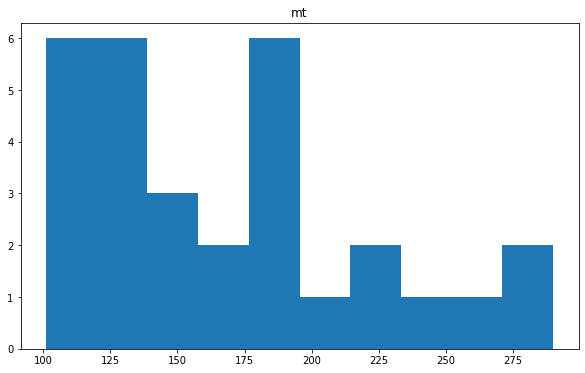

nl: 222; 55445


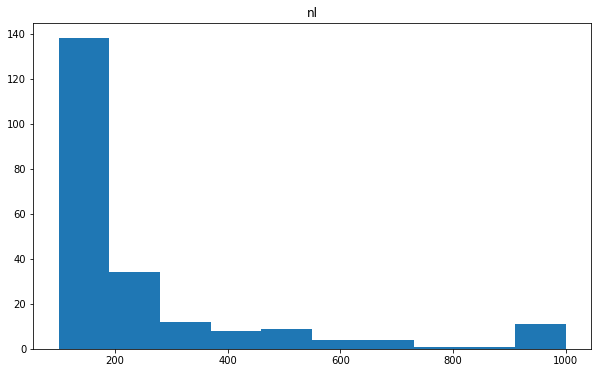

pl: 300; 98305


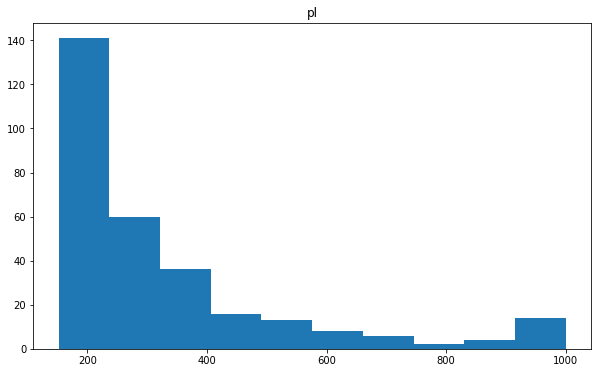

pt: 266; 66015


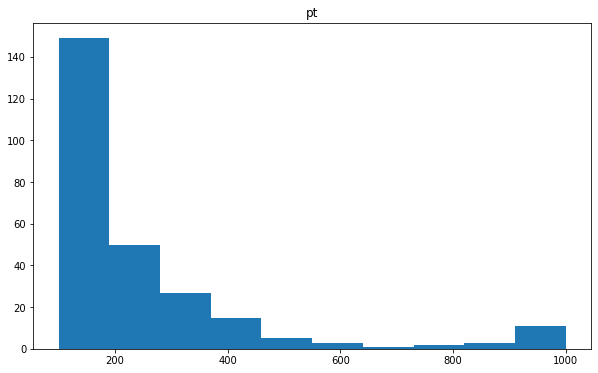

ro: 19; 4496


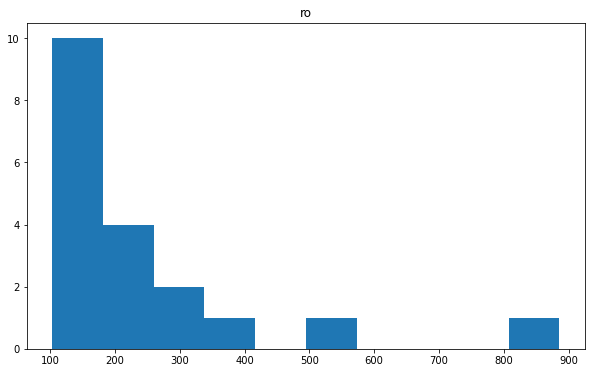

ru: 300; 130305


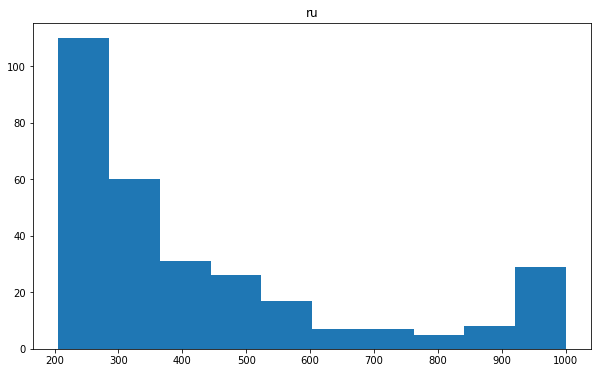

sv: 24; 5116


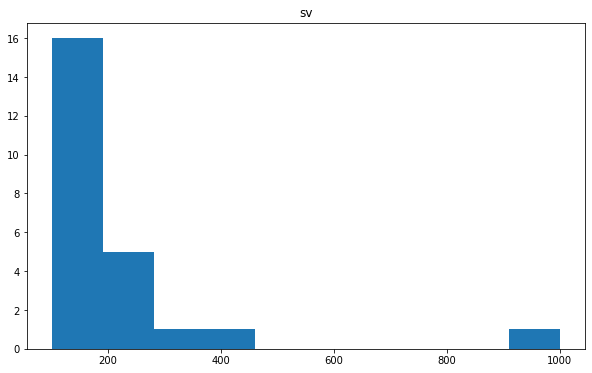

tr: 98; 19413


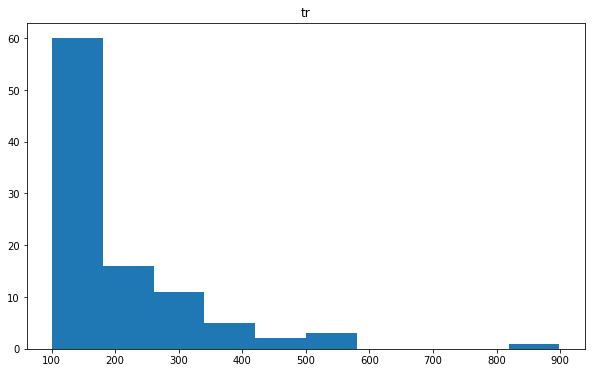

tt: 119; 26218


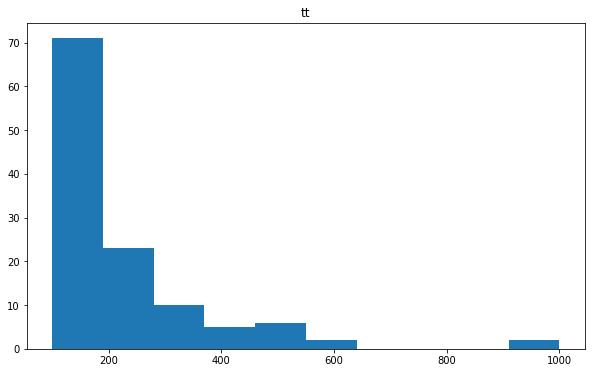

uk: 45; 7669


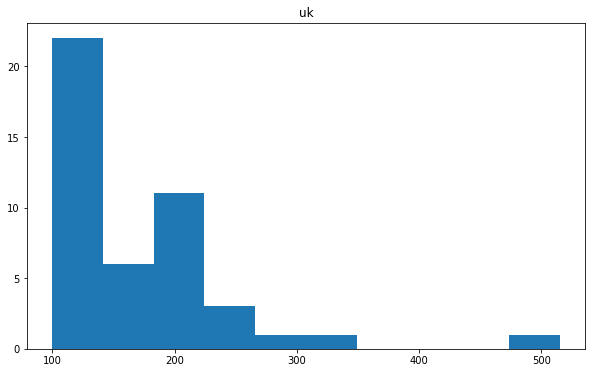

In [6]:
sums = []
lens = []
for language in languages:
    counts = df[df['language'] == language]['label'].value_counts().values
    print(f'{language}: {len(counts)}; {sum(counts)}')
    sums.append(sum(counts))
    lens.append(len(counts))
    plt.figure(figsize=(10, 6))
    plt.hist(counts)
    plt.title(language)
    plt.show()

In [ ]:

plt.figure(figsize=(10, 6))
plt.bar(languages, sums)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(languages, lens)
plt.show()

In [ ]:
lower_bound = 100
upper_bound = 1000000
big_sum = 0
big_val_sum = 0
for language in languages:
    count = 0
    sum_ = 0
    val_sum = 0
    for x, y, z in stats_dict[language]:
        if y >= lower_bound:
            count += 1
            sum_ += min(upper_bound, y)
            val_sum += z
    big_sum += sum_
    big_val_sum += val_sum
    print(f'{language}: {count}; {sum_}; {val_sum}')
print(big_sum)
print(big_val_sum)

In [5]:
data = pd.read_csv('~/Desktop/coursework/new_data/csv/_all_top_200.csv', delimiter=',')
data.head()

,Unnamed: 0,index,mode,label,path
0,1021263,99550,val,seja,pt/clips/seja/common_voice_pt_21816860.wav
1,1270993,20909,train,белән,tt/clips/белән/common_voice_tt_17782392.wav
2,1017852,96139,train,seus,pt/clips/seus/common_voice_pt_20120252.wav
3,863828,99975,train,się,pl/clips/się/common_voice_pl_20705736.wav
4,374719,13443,train,hiele,fy/clips/hiele/common_voice_fy-NL_21411746.wav


In [19]:
stats = data['label'].value_counts()
for label, counts in zip(list(stats.index), list(stats.counts))
    if counts > 200:
        

Index(['się', 'nie', 'eta', 'een', 'het', 'estas', 'per', 'che', 'kaj', 'del',
       ...
       'pateko', 'kiekis', 'užima', 'vyrauja', 'įrengtas', 'kalbos',
       'pradžios', 'seniausių', 'imperijos', 'visoje'],
      dtype='object', length=4017) [17790 15543 12906 ...     4     4     4]


się          17790
nie          15543
eta          12906
een          10535
het          10068
             ...  
kalbos           4
pradžios         4
seniausių        4
imperijos        4
visoje           4
Name: label, Length: 4017, dtype: int64
4017
[17790, 15543, 12906, 10535, 10068, 9915, 9469, 8586, 8406, 7569, 6953, 6834, 6694, 6581, 6236, 5945, 5572, 5425, 5159, 4791, 4445, 4412, 4338, 4277, 4153, 4125, 4123, 4123, 3970, 3900, 3874, 3815, 3815, 3793, 3745, 3744, 3570, 3521, 3443, 3317, 3316, 3314, 3224, 3147, 3007, 2964, 2958, 2918, 2880, 2809, 2795, 2767, 2762, 2760, 2741, 2710, 2683, 2666, 2612, 2587, 2494, 2492, 2482, 2448, 2316, 2310, 2285, 2261, 2258, 2220, 2173, 2166, 2154, 2150, 2140, 2070, 2033, 2032, 2010, 2003, 1999, 1987, 1979, 1976, 1940, 1931, 1893, 1854, 1821, 1795, 1792, 1791, 1787, 1768, 1757, 1751, 1750, 1742, 1739, 1738, 1724, 1722, 1722, 1702, 1693, 1690, 1686, 1678, 1673, 1660, 1657, 1649, 1644, 1633, 1633, 1617, 1615, 1606, 1597, 1588, 1588, 1576, 1571, 15

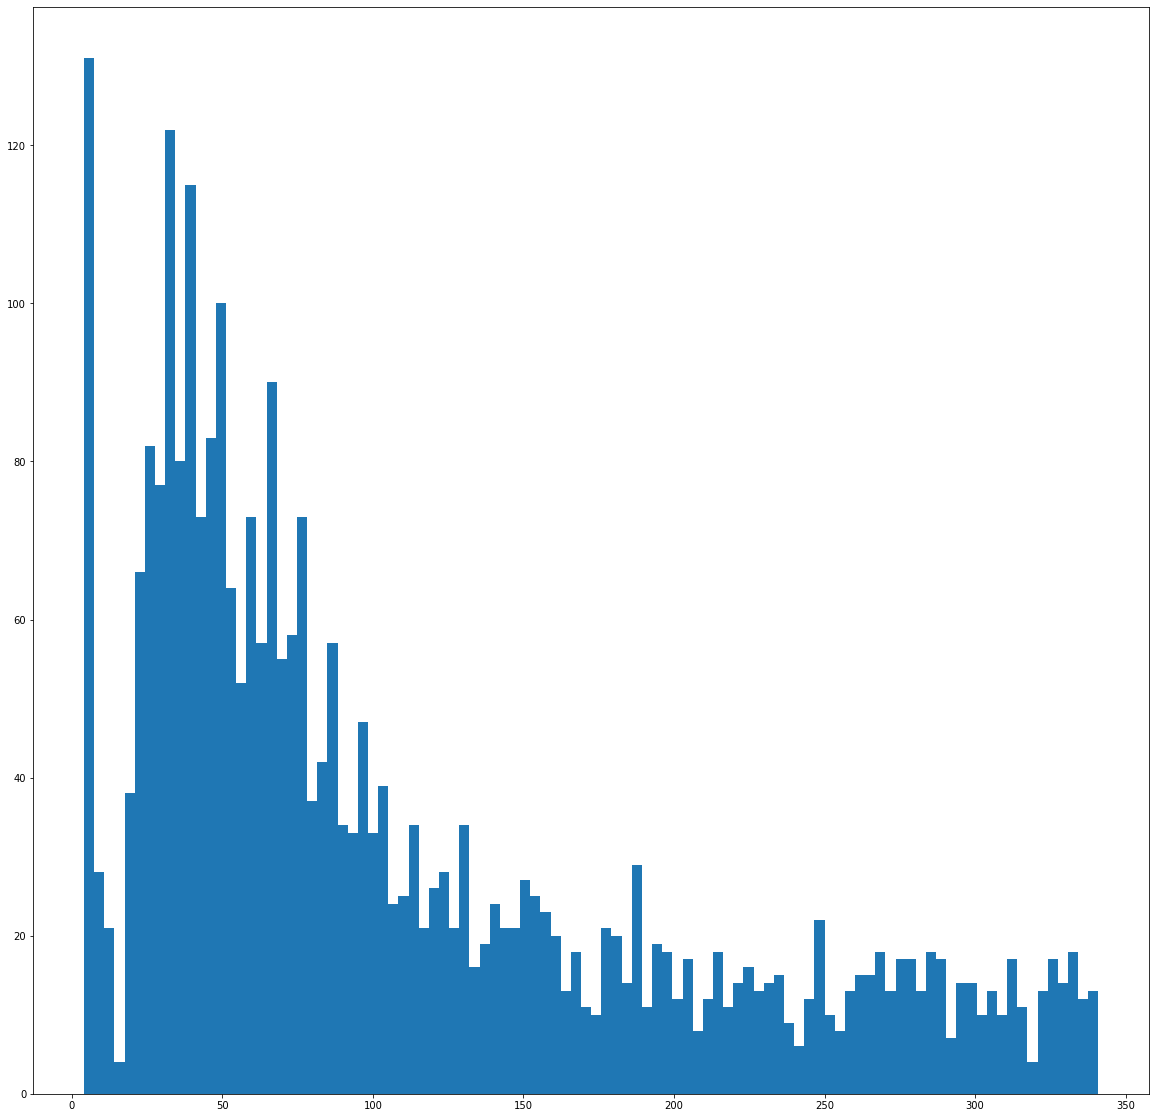

In [24]:
stats = data['label'].value_counts()
print(stats)
print(len(stats))
print(list(stats)[:300])
print(list(stats)[-300:])
plt.figure(figsize=(20, 20))
plt.hist(list(stats)[1000:], bins=100)
plt.show()